In [1]:
import tensorflow.keras.layers as Layers
import tensorflow.python.keras.layers.convolutional as Convolutional
import h5py
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
from sklearn.model_selection import GridSearchCV
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images have different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [3]:
Images, Labels = get_images('seg_train\\seg_train\\')
                            #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [4]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


In [5]:
Images_train, Images_test, Labels_train, Labels_test = train_test_split(
     Images, Labels, test_size=0.2, random_state=42) # Separates the Images in Train and Test partition with a ratio of 0.2

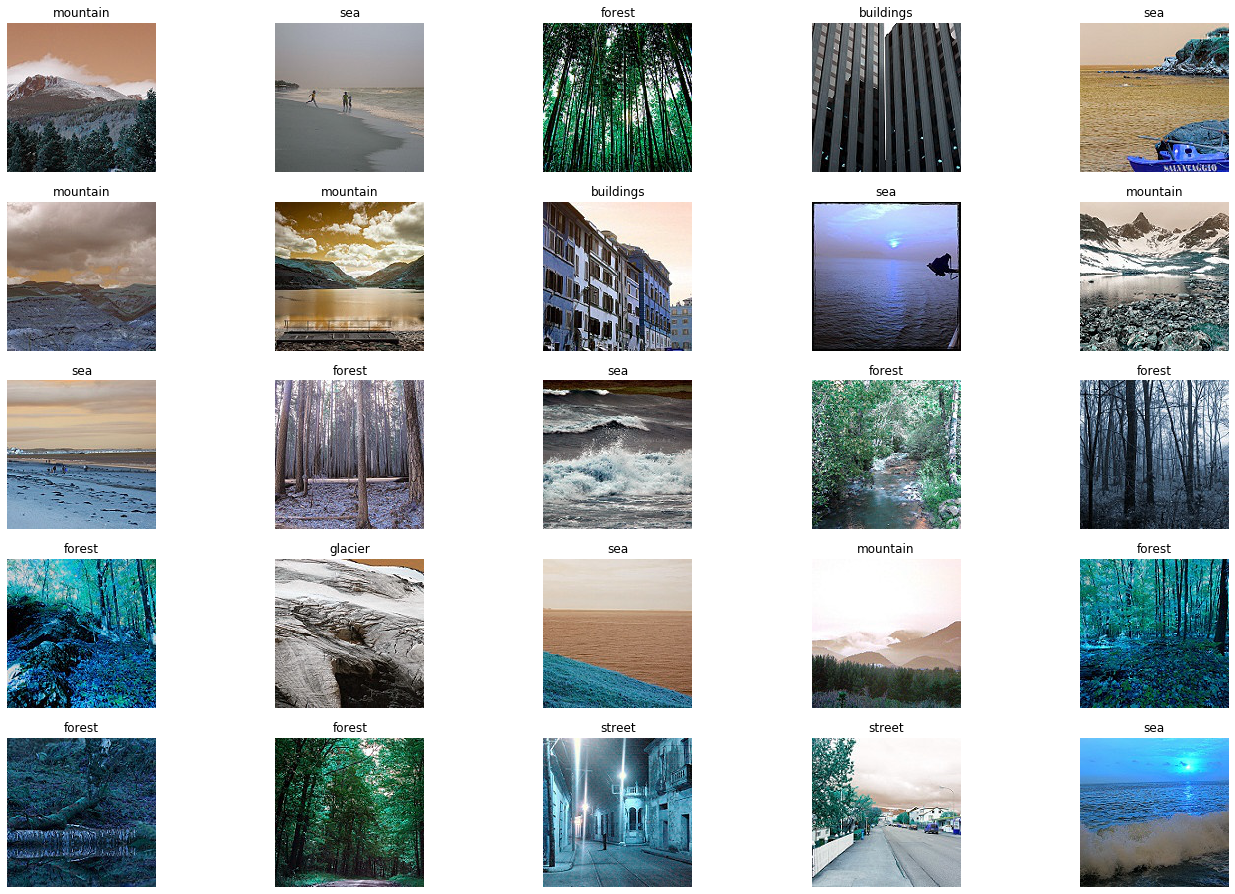

In [9]:
f,ax = plot.subplots(5,5) 

f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images_test))
        ax[i,j].imshow(Images_test[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels_test[rnd_number]))
        ax[i,j].axis('off')

In [10]:
Images_test.shape


(2807, 150, 150, 3)

In [11]:
Labels_test.shape

(2807,)

In [12]:
Images_train.shape


(11227, 150, 150, 3)

In [13]:
Labels_train.shape

(11227,)

In [14]:
def create_model():
       
    model = Models.Sequential()
    model.add(Layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
    model.add(Layers.MaxPooling2D(2,2))
    model.add(Layers.Conv2D(32, (3, 3), activation = 'relu'))
    model.add(Layers.MaxPooling2D(2,2))
    model.add(Layers.Flatten())
    model.add(Layers.Dropout(rate=0.3))
    model.add(Layers.Dense(50,activation='relu'))
    model.add(Layers.Dense(6,activation='softmax'))
    model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

model = create_model()

trained = model.fit(Images_train, Labels_train , epochs=15, validation_split=0.30)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 7858 samples, validate on 3369 samples
Epoch 1/15
7858/7858 [==============================] - 52s 7ms/sample - loss: 3.0332 - acc: 0.1708 - val_loss: 1.7917 - val_acc: 0.1665 22s - loss: 4.2688 - a - ETA: 18s -  - 
Epoch 2/15
7858/7858 [==============================] - 52s 7ms/sample - loss: 1.7913 - acc: 0.1710 - val_loss: 1.7917 - val_acc: 0.1775s - ETA: 10s - loss: 1.7912 - acc: 0 - ETA: 9s - loss: 1.7913  - ETA: 0s - loss: 1.7913 - acc: 0.171
Epoch 3/15
7858/7858 [==============================] - 53s 7ms/sample - loss: 1.7914 - acc: 0.1761 - val_loss: 1.7916 - val_acc: 0.1775 loss: 1.7914 - a - ETA: 25s - loss: 1.79 - ETA: 20s - loss - ETA: 11s -
Epoch 4/15
7858/7858 [==============================] - 52s 7ms/sample - loss: 1.7913 - acc: 0.1779 - val_loss: 1.7916 - val_acc: 0.17753 - acc: 0.18 - ETA: 26s - loss: 1.7913 - acc: 0. - ETA: 25s - loss: 1.7913

In [15]:
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
    model = Models.Sequential()
    model.add(Layers.Conv2D(32, (3, 3), activation = activation, input_shape = (150, 150, 3)))
    model.add(Layers.MaxPooling2D(2,2))
    model.add(Layers.Conv2D(32, (3, 3), activation = 'relu'))
    model.add(Layers.MaxPooling2D(2,2))
    model.add(Layers.Flatten())
    model.add(Layers.Dropout(rate=0.3))
    model.add(Layers.Dense(50,activation='relu'))
    model.add(Layers.Dense(6,activation='softmax'))
    model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=50, verbose=2)
# define the grid search parameters
activation = ['softmax', 'relu', 'tanh', 'sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(Images_test, Labels_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/15
1871/1871 - 38s - loss: 1.4331 - acc: 0.4035
Epoch 2/15
1871/1871 - 37s - loss: 1.0746 - acc: 0.5794
Epoch 3/15
1871/1871 - 38s - loss: 0.9237 - acc: 0.6542
Epoch 4/15
1871/1871 - 38s - loss: 0.8231 - acc: 0.6841
Epoch 5/15
1871/1871 - 38s - loss: 0.7280 - acc: 0.7413
Epoch 6/15
1871/1871 - 37s - loss: 0.6830 - acc: 0.7595
Epoch 7/15
1871/1871 - 36s - loss: 0.5838 - acc: 0.8081
Epoch 8/15
1871/1871 - 36s - loss: 0.5388 - acc: 0.8284
Epoch 9/15
1871/1871 - 36s - loss: 0.4858 - acc: 0.8637
Epoch 10/15
1871/1871 - 36s - loss: 0.4491 - acc: 0.8675
Epoch 11/15
1871/1871 - 36s - loss: 0.3914 - acc: 0.8979
Epoch 12/15
1871/1871 - 37s - loss: 0.3577 - acc: 0.9070
Epoch 13/15
1871/1871 - 36s - loss: 0.3360 - acc: 0.9188
Epoch 14/15
1871/1871 - 37s - loss: 0.3005 - acc: 0.9311
Epoch 15/15
1871/1871 - 37s - loss: 0.2735 - acc: 0.9375
936/936 - 6s - loss: 0.9237 - acc: 0.6795
Epoch 1/15
1871/1871 - 36s - loss: 1.3872 - acc: 0.4367
Epoch 2/15
1871/1871 - 36s - loss: 1.0164 - acc: 0.6200


Epoch 5/15
1871/1871 - 19s - loss: 0.9523 - acc: 0.6553
Epoch 6/15
1871/1871 - 20s - loss: 0.8295 - acc: 0.7125
Epoch 7/15
1871/1871 - 19s - loss: 0.7742 - acc: 0.7173
Epoch 8/15
1871/1871 - 20s - loss: 0.7185 - acc: 0.7557
Epoch 9/15
1871/1871 - 19s - loss: 0.6406 - acc: 0.7873
Epoch 10/15
1871/1871 - 19s - loss: 0.6382 - acc: 0.7718
Epoch 11/15
1871/1871 - 19s - loss: 0.5745 - acc: 0.8156
Epoch 12/15
1871/1871 - 19s - loss: 0.5379 - acc: 0.8295
Epoch 13/15
1871/1871 - 19s - loss: 0.5073 - acc: 0.8455
Epoch 14/15
1871/1871 - 19s - loss: 0.4584 - acc: 0.8632
Epoch 15/15
1871/1871 - 18s - loss: 0.4272 - acc: 0.8797
936/936 - 2s - loss: 0.8331 - acc: 0.7009
Epoch 1/15
1871/1871 - 18s - loss: 1.6264 - acc: 0.3538
Epoch 2/15
1871/1871 - 18s - loss: 1.2799 - acc: 0.4800
Epoch 3/15
1871/1871 - 18s - loss: 1.1165 - acc: 0.5617
Epoch 4/15
1871/1871 - 19s - loss: 1.0179 - acc: 0.6040
Epoch 5/15
1871/1871 - 19s - loss: 0.9471 - acc: 0.6382
Epoch 6/15
1871/1871 - 18s - loss: 0.9069 - acc: 0.6713


In [17]:
def create_model(init_mode='uniform'):
    
    model = Models.Sequential()
    model.add(Layers.Conv2D(32, (3, 3), activation = 'softmax', input_shape = (150, 150, 3), kernel_initializer=init_mode))
    model.add(Layers.MaxPooling2D(2,2))
    model.add(Layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer=init_mode))
    model.add(Layers.MaxPooling2D(2,2))
    model.add(Layers.Flatten())
    model.add(Layers.Dropout(rate=0.3))
    model.add(Layers.Dense(50,activation='relu'))
    model.add(Layers.Dense(6,activation='softmax', kernel_initializer=init_mode))
    model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=15, batch_size=50, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'normal', 'zero']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
grid_result = grid.fit(Images_test, Labels_test, validation_split=0.3)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 1309 samples, validate on 562 samples
Epoch 1/15
1309/1309 [==============================] - 25s 19ms/sample - loss: 1.7706 - acc: 0.1940 - val_loss: 1.7273 - val_acc: 0.2153
Epoch 2/15
1309/1309 [==============================] - 25s 19ms/sample - loss: 1.6313 - acc: 0.3193 - val_loss: 1.5221 - val_acc: 0.4431
Epoch 3/15
1309/1309 [==============================] - 25s 19ms/sample - loss: 1.4160 - acc: 0.4614 - val_loss: 1.3341 - val_acc: 0.4964
Epoch 4/15
1309/1309 [==============================] - 25s 19ms/sample - loss: 1.2443 - acc: 0.5516 - val_loss: 1.1971 - val_acc: 0.5302
Epoch 5/15
1309/1309 [==============================] - 25s 19ms/sample - loss: 1.1394 - acc: 0.5668 - val_loss: 1.1139 - val_acc: 0.5480
Epoch 6/15
1309/1309 [==============================] - 25s 19ms/sample - loss: 1.0694 - acc: 0.5859 - val_loss: 1.0623 - val_acc: 0.5676
Epoch 7

Epoch 7/15
1309/1309 [==============================] - 27s 21ms/sample - loss: 0.9136 - acc: 0.6677 - val_loss: 1.0028 - val_acc: 0.6174
Epoch 8/15
1309/1309 [==============================] - 26s 20ms/sample - loss: 0.8747 - acc: 0.6761 - val_loss: 0.9325 - val_acc: 0.6548
Epoch 9/15
1309/1309 [==============================] - 26s 20ms/sample - loss: 0.8192 - acc: 0.7044 - val_loss: 0.9084 - val_acc: 0.6548
Epoch 10/15
1309/1309 [==============================] - 25s 19ms/sample - loss: 0.7775 - acc: 0.7227 - val_loss: 0.9050 - val_acc: 0.6406
Epoch 11/15
1309/1309 [==============================] - 26s 20ms/sample - loss: 0.7497 - acc: 0.7334 - val_loss: 0.8558 - val_acc: 0.6726
Epoch 12/15
1309/1309 [==============================] - 25s 19ms/sample - loss: 0.7033 - acc: 0.7639 - val_loss: 0.8464 - val_acc: 0.6619
Epoch 13/15
1309/1309 [==============================] - 25s 19ms/sample - loss: 0.6559 - acc: 0.7785 - val_loss: 0.8433 - val_acc: 0.6601
Epoch 14/15
1309/1309 [=======

In [16]:
# Use scikit-learn to grid search the dropout rate
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import max_norm


In [18]:
# Use scikit-learn to grid search the number of neurons
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import max_norm
# Function to create model, required for KerasClassifier
def create_model(neurons=1):
    # create model
    model = Models.Sequential()
    model.add(Layers.Conv2D(neurons, (3, 3), activation = 'softmax', input_shape = (150, 150, 3), kernel_initializer='uniform'))
    model.add(Layers.MaxPooling2D(2,2))
    model.add(Layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='uniform'))
    model.add(Layers.MaxPooling2D(2,2))
    model.add(Layers.Flatten())
    model.add(Layers.Dropout(rate=0.3))
    model.add(Layers.Dense(50,activation='relu'))
    model.add(Layers.Dense(6,activation='softmax', kernel_initializer='uniform'))
    model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=13, batch_size=50, verbose=1)
# define the grid search parameters
neurons = [32, 64, 128 ]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(Images_test, Labels_test, validation_split=0.3)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Train on 982 samples, validate on 421 samples
Epoch 1/13
982/982 [==============================] - 20s 21ms/sample - loss: 1.7896 - acc: 0.1843 - val_loss: 1.7826 - val_acc: 0.2399
Epoch 2/13
982/982 [==============================] - 19s 19ms/sample - loss: 1.7586 - acc: 0.2719 - val_loss: 1.7151 - val_acc: 0.2827
Epoch 3/13
982/982 [==============================] - 19s 19ms/sample - loss: 1.6172 - acc: 0.3004 - val_loss: 1.5098 - val_acc: 0.3135
Epoch 4/13
982/982 [==============================] - 19s 19ms/sample - loss: 1.4048 - acc: 0.3788 - val_loss: 1.3246 - val_acc: 0.4679
Epoch 5/13
982/982 [==============================] - 19s 19ms/sample - loss: 1.2621 - acc: 0.5000 - val_loss: 1.2151 - val_acc: 0.5534
Epoch 6/13
982/982 [==============================] - 19s 19ms/sample - loss: 1.1813 - acc: 0.5356 - val_loss: 1.1543 - val_acc: 0.5819
Epoch 7/13
982/982 [==============================] - 19s 19ms/sample - loss: 1.1045 - acc: 0.5601 - val_loss: 1.0995 - val_acc: 0.5938
Ep

Epoch 5/13
982/982 [==============================] - 75s 76ms/sample - loss: 1.1078 - acc: 0.5580 - val_loss: 1.0989 - val_acc: 0.5677
Epoch 6/13
982/982 [==============================] - 75s 77ms/sample - loss: 1.0500 - acc: 0.5967 - val_loss: 1.0598 - val_acc: 0.5891
Epoch 7/13
982/982 [==============================] - 76s 77ms/sample - loss: 1.0041 - acc: 0.6130 - val_loss: 1.0533 - val_acc: 0.5938
Epoch 8/13
982/982 [==============================] - 76s 77ms/sample - loss: 0.9582 - acc: 0.6263 - val_loss: 0.9793 - val_acc: 0.6318
Epoch 9/13
982/982 [==============================] - 77s 79ms/sample - loss: 0.9220 - acc: 0.6314 - val_loss: 0.9691 - val_acc: 0.6413
Epoch 10/13
982/982 [==============================] - 76s 78ms/sample - loss: 0.8987 - acc: 0.6619 - val_loss: 0.9743 - val_acc: 0.6295
Epoch 11/13
982/982 [==============================] - 77s 78ms/sample - loss: 0.8777 - acc: 0.6599 - val_loss: 0.9298 - val_acc: 0.6770
Epoch 12/13
982/982 [=========================

In [19]:
# Function to create model, required for KerasClassifier
def create_model(dropout_rate=0.0):
    # create model
    model = Models.Sequential()
    model.add(Layers.Conv2D(128, (3, 3), activation = 'softmax', input_shape = (150, 150, 3), kernel_initializer='uniform'))
    model.add(Layers.MaxPooling2D(2,2))
    model.add(Layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='uniform'))
    model.add(Layers.MaxPooling2D(2,2))
    model.add(Layers.Flatten())
    model.add(Layers.Dropout(dropout_rate))
    model.add(Layers.Dense(50,  activation='relu'))
    model.add(Layers.Dense(6,activation='softmax', kernel_initializer='uniform'))
    model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# create model
model = KerasClassifier(build_fn=create_model, epochs=13, batch_size=50, verbose=1)
# define the grid search parameters
dropout_rate = [0.2, 0.3, 0.4]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(Images_test, Labels_test, validation_split=0.3)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Train on 982 samples, validate on 421 samples
Epoch 1/13
982/982 [==============================] - 75s 76ms/sample - loss: 1.7339 - acc: 0.3238 - val_loss: 1.6689 - val_acc: 0.3397
Epoch 2/13
982/982 [==============================] - 76s 77ms/sample - loss: 1.5309 - acc: 0.4552 - val_loss: 1.4425 - val_acc: 0.5226
Epoch 3/13
982/982 [==============================] - 75s 76ms/sample - loss: 1.3028 - acc: 0.5326 - val_loss: 1.2241 - val_acc: 0.5558
Epoch 4/13
982/982 [==============================] - 75s 77ms/sample - loss: 1.1264 - acc: 0.5754 - val_loss: 1.0698 - val_acc: 0.6105
Epoch 5/13
982/982 [==============================] - 75s 76ms/sample - loss: 1.0202 - acc: 0.6059 - val_loss: 0.9993 - val_acc: 0.6366
Epoch 6/13
982/982 [==============================] - 75s 77ms/sample - loss: 0.9601 - acc: 0.6120 - val_loss: 0.9439 - val_acc: 0.6698
Epoch 7/13
982/982 [==============================] - 75s 77ms/sample - loss: 0.9052 - acc: 0.6395 - val_loss: 0.9368 - val_acc: 0.6390
Ep

Epoch 5/13
982/982 [==============================] - 74s 76ms/sample - loss: 1.0493 - acc: 0.5947 - val_loss: 1.0498 - val_acc: 0.5867
Epoch 6/13
982/982 [==============================] - 76s 77ms/sample - loss: 0.9761 - acc: 0.6385 - val_loss: 1.0008 - val_acc: 0.6223
Epoch 7/13
982/982 [==============================] - 76s 77ms/sample - loss: 0.9129 - acc: 0.6527 - val_loss: 0.9560 - val_acc: 0.6580
Epoch 8/13
982/982 [==============================] - 76s 77ms/sample - loss: 0.8621 - acc: 0.6782 - val_loss: 0.9171 - val_acc: 0.6746
Epoch 9/13
982/982 [==============================] - 76s 77ms/sample - loss: 0.8249 - acc: 0.6935 - val_loss: 0.9061 - val_acc: 0.6698
Epoch 10/13
982/982 [==============================] - 75s 77ms/sample - loss: 0.7934 - acc: 0.7159 - val_loss: 0.8971 - val_acc: 0.6556
Epoch 11/13
982/982 [==============================] - 76s 78ms/sample - loss: 0.7558 - acc: 0.7342 - val_loss: 0.8625 - val_acc: 0.6817
Epoch 12/13
982/982 [=========================

In [20]:
def create_model(neurons=32):
    # create model
    model = Models.Sequential()
    model.add(Layers.Conv2D(neurons, (3, 3), activation = 'softmax', input_shape = (150, 150, 3), kernel_initializer='uniform'))
    model.add(Layers.MaxPooling2D(2,2))
    model.add(Layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='uniform'))
    model.add(Layers.MaxPooling2D(2,2))
    model.add(Layers.Flatten())
    model.add(Layers.Dropout(rate=0.3))
    model.add(Layers.Dense(50,activation='relu'))
    model.add(Layers.Dense(6,activation='softmax', kernel_initializer='uniform'))
    model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

model = create_model()
history = model.fit(Images, Labels, epochs=13, batch_size=100, verbose=1, validation_split = 0.2)

Train on 11227 samples, validate on 2807 samples
Epoch 1/13
11227/11227 [==============================] - 317s 28ms/sample - loss: 1.3243 - acc: 0.4903 - val_loss: 1.0159 - val_acc: 0.5910
Epoch 2/13
11227/11227 [==============================] - 315s 28ms/sample - loss: 0.9443 - acc: 0.6370 - val_loss: 0.8691 - val_acc: 0.6662
Epoch 3/13
11227/11227 [==============================] - 312s 28ms/sample - loss: 0.8298 - acc: 0.6894 - val_loss: 0.7848 - val_acc: 0.7104
Epoch 4/13
11227/11227 [==============================] - 312s 28ms/sample - loss: 0.7512 - acc: 0.7203 - val_loss: 0.7178 - val_acc: 0.7371
Epoch 5/13
11227/11227 [==============================] - 311s 28ms/sample - loss: 0.6895 - acc: 0.7480 - val_loss: 0.6867 - val_acc: 0.7503
Epoch 6/13
11227/11227 [==============================] - 311s 28ms/sample - loss: 0.6568 - acc: 0.7579 - val_loss: 0.6686 - val_acc: 0.7592
Epoch 7/13
11227/11227 [==============================] - 317s 28ms/sample - loss: 0.6297 - acc: 0.7700 -

In [21]:
def create_model(neurons=128):
    # create model
    model = Models.Sequential()
    model.add(Layers.Conv2D(neurons, (3, 3), activation = 'softmax', input_shape = (150, 150, 3), kernel_initializer='uniform'))
    model.add(Layers.MaxPooling2D(2,2))
    model.add(Layers.Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='uniform'))
    model.add(Layers.MaxPooling2D(2,2))
    model.add(Layers.Flatten())
    model.add(Layers.Dropout(rate=0.3))
    model.add(Layers.Dense(50,activation='relu'))
    model.add(Layers.Dense(6,activation='softmax', kernel_initializer='uniform'))
    model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

model = create_model()
history2 = model.fit(Images, Labels, epochs=13, batch_size=100, verbose=1)

Epoch 1/13
14034/14034 [==============================] - 1502s 107ms/sample - loss: 1.1991 - acc: 0.5345
Epoch 2/13
14034/14034 [==============================] - 931s 66ms/sample - loss: 0.8125 - acc: 0.7051
Epoch 3/13
14034/14034 [==============================] - 929s 66ms/sample - loss: 0.6918 - acc: 0.7548
Epoch 4/13
14034/14034 [==============================] - 933s 67ms/sample - loss: 0.6350 - acc: 0.7738
Epoch 5/13
14034/14034 [==============================] - 926s 66ms/sample - loss: 0.5893 - acc: 0.7931
Epoch 6/13
14034/14034 [==============================] - 931s 66ms/sample - loss: 0.5602 - acc: 0.8034
Epoch 7/13
14034/14034 [==============================] - 942s 67ms/sample - loss: 0.5367 - acc: 0.8157
Epoch 8/13
14034/14034 [==============================] - 1019s 73ms/sample - loss: 0.5138 - acc: 0.8222
Epoch 9/13
14034/14034 [==============================] - 1017s 72ms/sample - loss: 0.5048 - acc: 0.8254
Epoch 10/13
14034/14034 [==============================] - 1

In [22]:
# Save the entire model as a SavedModel.
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.



model.save('cvfinal_model.h5')  # creates a HDF5 file 'my_model.h5'



In [37]:
model = create_model()
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 72, 72, 32)        36896     
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 41472)             0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 41472)             0         
_________________________________________________________________
dense_70 (Dense)             (None, 50)              

In [23]:
test_images, test_labels = get_images('\\seg_test\\seg_test\\')
                            #Extract the training images from the folders.

test_images = np.array(test_images) #converting the list of images to numpy array.
test_labels = np.array(test_labels)

In [24]:
test_loss = model.evaluate(test_images, test_labels)

3000/3000 [==============================] - 67s 22ms/sample - loss: 0.5032 - acc: 0.8213


In [25]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os


# Training parameters
batch_size = 200  # orig paper trained all networks with batch_size=128
epochs = 15
data_augmentation = False
num_classes = 6

# Subtracting pixel mean improves accuracy
subtract_pixel_mean = False

n = 3 #ResNet20

version = 1 #version ResNet

# Computed depth from supplied model parameter n
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)



# Input image dimensions.
input_shape = (150,150,3)

# If subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    Images_test -= x_train_mean

print('Images_train shape:', Images_train.shape)
print(Images_train.shape[0], 'train samples')
print(Images_test.shape[0], 'test samples')
print('Labels_train shape:', Labels_train.shape)

# Convert class vectors to binary class matrices.
#Labels_train = keras.utils.to_categorical(Labels_train, num_classes)
#Labels_test = keras.utils.to_categorical(Labels_test, num_classes)


def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=10):
    """ResNet Version 1 Model builder [a]

    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model


if version == 2:
    model = resnet_v2(input_shape=input_shape, depth=depth)
else:
    model = resnet_v1(input_shape=input_shape, depth=depth)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])

model.summary()
print(model_type)

# Prepare model model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'intel_dataset_%s_model.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler]

# Run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(Images_train, Labels_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(Images_test, Labels_test),
              shuffle=True,
              callbacks=callbacks)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(Labels_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(Images_train, Labels_train, batch_size=batch_size),
                        validation_data=(Images_test, Labels_test),
                        epochs=epochs, verbose=1, workers=4,
                        callbacks=callbacks)

# Score trained model.
scores = model.evaluate(Images_test, Labels_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Images_train shape: (11227, 150, 150, 3)
11227 train samples
2807 test samples
Labels_train shape: (11227,)







Learning rate:  0.001

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 150, 150, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 150, 150, 16) 64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 150, 150, 16) 0           batch

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 11227 samples, validate on 2807 samples
Epoch 1/15
Learning rate:  0.001
11227/11227 [==============================] - 1455s 130ms/step - loss: 1.3207 - acc: 0.5786 - val_loss: 1.6625 - val_acc: 0.4361

Epoch 00001: val_acc improved from -inf to 0.43605, saving model to C:\Users\leona\OneDrive\Documents\Machine learning\saved_models\intel_dataset_ResNet20v1_model.001.h5
Epoch 2/15
Learning rate:  0.001
11227/11227 [==============================] - 1453s 129ms/step - loss: 0.8709 - acc: 0.7383 - val_loss: 1.0144 - val_acc: 0.7079

Epoch 00002: val_acc improved from 0.43605 to 0.70787, saving model to C:\Users\leona\OneDrive\Documents\Machine learning\saved_models\intel_dataset_ResNet20v1_model.002.h5
Epoch 3/15
Learning rate:  0.001
11227/11227 [==============================] - 1437s 128ms/step - loss: 0.7338 - acc: 0.7938 - val_loss: 1.4916 - val_acc: 0.5796

Epoch 00003: val_acc d